In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
print(df.shape)

(200, 4)


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

TV              Axes(0.125,0.53;0.133621x0.35)
Radio        Axes(0.285345,0.53;0.133621x0.35)
Newspaper     Axes(0.44569,0.53;0.133621x0.35)
Sales        Axes(0.606034,0.53;0.133621x0.35)
dtype: object

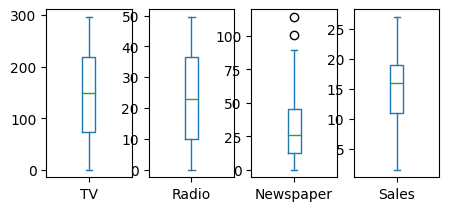

In [8]:
df.plot(kind ='box',subplots = True, layout =(2,5),sharex = False)

<Axes: >

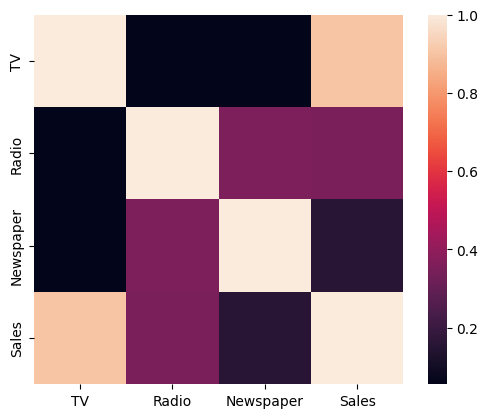

In [9]:
sns.heatmap(df.corr(), square=True)

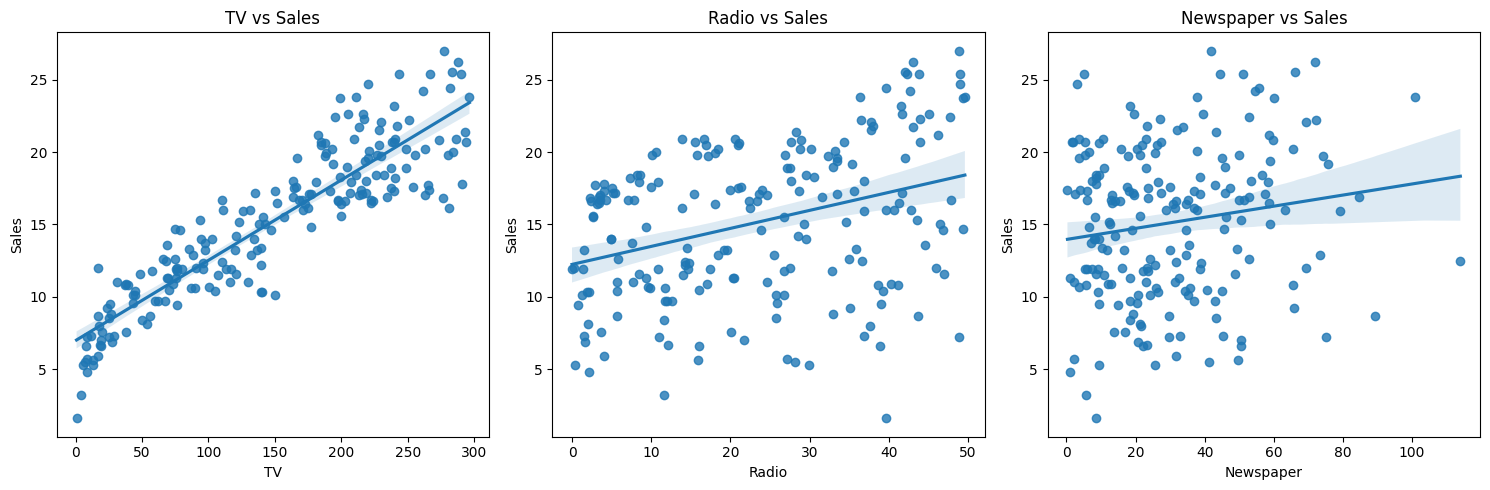

In [24]:
#sns.lmplot(x='TV', y='Sales', data=df)
# Set up the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Create the lmplot for each feature using the axes objects
sns.regplot(x='TV', y='Sales', data=df, ax=axes[0])
sns.regplot(x='Radio', y='Sales', data=df, ax=axes[1])
sns.regplot(x='Newspaper', y='Sales', data=df, ax=axes[2])

# Set titles for subplots
axes[0].set_title('TV vs Sales')
axes[1].set_title('Radio vs Sales')
axes[2].set_title('Newspaper vs Sales')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [11]:
#Correlation
corr_mat = df.corr()
print(corr_mat)

                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


In [12]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [17]:
print(X_train.shape)
print(y_test.shape)

(160, 3)
(40,)


In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model on the training data
model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [19]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2.9077569102710896
R-squared: 0.9059011844150826


In [20]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(),
    'Predict': y_pred.flatten()
})

act_predict.head(5)

,Actual,Predict
0,16.9,17.034772
1,22.4,20.409740
2,21.4,23.723989
3,7.3,9.272785
4,24.7,21.682719


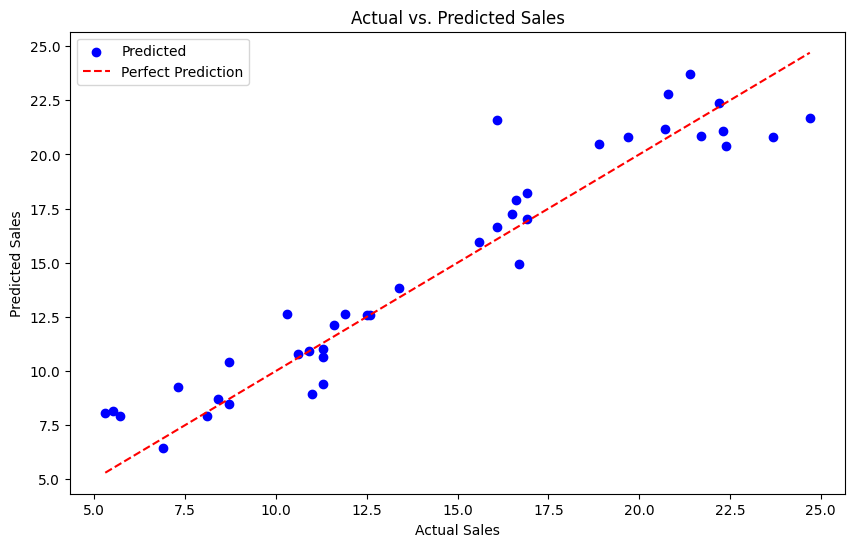

In [21]:
# Create a scatter plot of actual vs. predicted sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()